In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)

order_df = pd.read_csv("order.csv") 

account_df = pd.read_csv("account.csv")

account_df.head()

,account_id,district_id,frequency,date
0,1,18,POPLATEK MESICNE,1995-03-24
1,2,1,POPLATEK MESICNE,1993-02-26
2,3,5,POPLATEK MESICNE,1997-07-07
3,4,12,POPLATEK MESICNE,1996-02-21
4,5,15,POPLATEK MESICNE,1997-05-30


In [66]:
order_df.shape

(6471, 6)

In [67]:
order_df['k_symbol'] = order_df['k_symbol'].fillna('Other')
order_df['k_symbol'].value_counts(dropna=False)
order_df.head(10)

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,SIPO
1,29402,2,ST,89597016,3372.7,UVER
2,29403,2,QR,13943797,7266.0,SIPO
3,29404,3,WX,83084338,1135.0,SIPO
4,29405,3,CD,24485939,327.0,Other
5,29406,3,AB,59972357,3539.0,POJISTNE
6,29407,4,UV,26693541,2078.0,SIPO
7,29408,4,UV,5848086,1285.0,SIPO
8,29409,5,GH,37390208,2668.0,SIPO
9,29410,6,AB,44486999,3954.0,SIPO


In [68]:
order_dum = pd.get_dummies(order_df[['k_symbol']])

order_all = pd.concat([order_df,order_dum],axis=1,ignore_index=False)  

order_all = order_all.drop(columns = ['order_id','bank_to','account_to','k_symbol'])

for col in order_dum.columns:
    order_all[col] = order_all[col] * order_all['amount']

order_acc = order_all.groupby('account_id').sum()

order_acc = order_acc.rename(columns={"amount": "amount_order"})

order_acc.head()

,amount_order,k_symbol_LEASING,k_symbol_Other,k_symbol_POJISTNE,k_symbol_SIPO,k_symbol_UVER
account_id,,,,,,
1,2452.0,0.0,0.0,0.0,2452.0,0.0
2,10638.7,0.0,0.0,0.0,7266.0,3372.7
3,5001.0,0.0,327.0,3539.0,1135.0,0.0
4,3363.0,0.0,0.0,0.0,3363.0,0.0
5,2668.0,0.0,0.0,0.0,2668.0,0.0


In [69]:
account_df.head(10)

,account_id,district_id,frequency,date
0,1,18,POPLATEK MESICNE,1995-03-24
1,2,1,POPLATEK MESICNE,1993-02-26
2,3,5,POPLATEK MESICNE,1997-07-07
3,4,12,POPLATEK MESICNE,1996-02-21
4,5,15,POPLATEK MESICNE,1997-05-30
5,6,51,POPLATEK MESICNE,1994-09-27
6,7,60,POPLATEK MESICNE,1996-11-24
7,8,57,POPLATEK MESICNE,1995-09-21
8,9,70,POPLATEK MESICNE,1993-01-27
9,10,54,POPLATEK MESICNE,1996-08-28


In [70]:
account_df = pd.merge(account_df, order_acc, on='account_id', how='left')

account_df.head()

#Order now done.... onto to transactions

,account_id,district_id,frequency,date,amount_order,k_symbol_LEASING,k_symbol_Other,k_symbol_POJISTNE,k_symbol_SIPO,k_symbol_UVER
0,1,18,POPLATEK MESICNE,1995-03-24,2452.0,0.0,0.0,0.0,2452.0,0.0
1,2,1,POPLATEK MESICNE,1993-02-26,10638.7,0.0,0.0,0.0,7266.0,3372.7
2,3,5,POPLATEK MESICNE,1997-07-07,5001.0,0.0,327.0,3539.0,1135.0,0.0
3,4,12,POPLATEK MESICNE,1996-02-21,3363.0,0.0,0.0,0.0,3363.0,0.0
4,5,15,POPLATEK MESICNE,1997-05-30,2668.0,0.0,0.0,0.0,2668.0,0.0


In [71]:
#First half of transactions

trans_1_df = pd.read_csv("trans_1_filter.csv",parse_dates=[2])

trans_1_df = trans_1_df.drop(columns=['trans_id','bank','account'])

trans_1_df['k_symbol'] = trans_1_df['k_symbol'].replace(r'^\s*$', np.nan, regex=True)

trans_1_df['operation'] = trans_1_df['operation'].fillna('Other')
trans_1_df['k_symbol'] = trans_1_df['k_symbol'].fillna('Other')

trans_1_df_dum = pd.get_dummies(trans_1_df[['type','operation','k_symbol']])

trans_1_df_all = pd.concat([trans_1_df,trans_1_df_dum],axis=1,ignore_index=False)  

for col in trans_1_df_dum.columns:
    trans_1_df_all[col] = trans_1_df_all[col] * trans_1_df_all['amount']

    
trans_1_df_all = trans_1_df_all.drop(columns = ['type','operation','k_symbol'])    

trans_1_df_all.head()


,account_id,date,amount,balance,type_PRIJEM,type_VYBER,type_VYDAJ,operation_Other,operation_PREVOD NA UCET,operation_PREVOD Z UCTU,operation_VKLAD,operation_VYBER,operation_VYBER KARTOU,k_symbol_Other,k_symbol_POJISTNE,k_symbol_SANKC. UROK,k_symbol_SIPO,k_symbol_SLUZBY,k_symbol_UROK
0,2,1993-02-26,1100,1100,1100,0,0,0,0,0,1100,0,0,1100,0,0,0,0,0
1,2,1993-03-12,20236,21336,20236,0,0,0,0,20236,0,0,0,20236,0,0,0,0,0
2,2,1993-04-12,20236,45286,20236,0,0,0,0,20236,0,0,0,20236,0,0,0,0,0
3,2,1993-05-12,20236,54631,20236,0,0,0,0,20236,0,0,0,20236,0,0,0,0,0
4,2,1993-06-12,30354,67530,30354,0,0,0,0,30354,0,0,0,30354,0,0,0,0,0


In [72]:
trans_acc = trans_1_df_all.groupby('account_id').agg({ 'date' : ['min','max'],
                            'amount' : ['sum','mean','std'],
                            'balance': ['min','max','mean','std'],
                            'type_PRIJEM' : ['sum'],
                            'type_VYBER': ['sum'],
                            'type_VYDAJ': ['sum'], 
                            'operation_Other': ['sum'], 
                            'operation_PREVOD NA UCET': ['sum'],
                            'operation_PREVOD Z UCTU': ['sum'], 
                            'operation_VKLAD': ['sum'],
                            'operation_VYBER': ['sum'],
                            'operation_VYBER KARTOU': ['sum'], 
                            #'k_symbol_DUCHOD': ['sum'],
                            'k_symbol_Other': ['sum'], 
                            'k_symbol_POJISTNE': ['sum'], 
                            'k_symbol_SANKC. UROK': ['sum'],
                            'k_symbol_SIPO': ['sum'], 
                            'k_symbol_SLUZBY': ['sum'], 
                            'k_symbol_UROK': ['sum'], 
                            #'k_symbol_UVER': ['sum']
                            })



trans_acc.columns = ["_".join(x) for x in trans_acc.columns.ravel()]

trans_acc.head()

,date_min,date_max,amount_sum,amount_mean,amount_std,balance_min,balance_max,balance_mean,balance_std,type_PRIJEM_sum,type_VYBER_sum,type_VYDAJ_sum,operation_Other_sum,operation_PREVOD NA UCET_sum,operation_PREVOD Z UCTU_sum,operation_VKLAD_sum,operation_VYBER_sum,operation_VYBER KARTOU_sum,k_symbol_Other_sum,k_symbol_POJISTNE_sum,k_symbol_SANKC. UROK_sum,k_symbol_SIPO_sum,k_symbol_SLUZBY_sum,k_symbol_UROK_sum
account_id,,,,,,,,,,,,,,,,,,,,,,,,
2,1993-02-26,1993-12-31,429534,7954.333333,8793.201591,1100,67530,32590.759259,12061.802206,228687,47827,153020,1291,36330,222596,4800,164517,0,391823,0,0,36330,90,1291
19,1995-04-07,1996-04-10,468508,5856.350000,7074.850795,715,58158,25197.137500,15039.321182,242180,28308,198020,2835,0,211945,27400,226328,0,338153,0,0,127400,120,2835
25,1996-07-28,1997-12-06,1986693,12113.981707,15599.382022,900,119653,62991.408537,22476.380134,1009156,66843,910694,4087,114384,0,1005069,863153,0,1884662,2296,0,95438,210,4087
37,1997-08-18,1998-10-12,878356,7572.034483,11817.595990,-1011,104762,39954.034483,23451.696220,447360,41655,389341,2303,59976,0,445057,371020,0,846920,1164,0,27804,165,2303
38,1997-08-08,1998-04-10,259391,4716.200000,5740.513545,13841,55991,31383.581818,10950.723180,148404,5896,105091,1114,29671,131490,15800,81316,0,229641,912,0,27604,120,1114


In [73]:
#Second Half of Transactions

trans_2_df = pd.read_csv("trans_2_filter.csv",parse_dates=[2])

trans_2_df = trans_2_df.drop(columns=['trans_id','bank','account'])

trans_2_df['k_symbol'] = trans_2_df['k_symbol'].replace(r'^\s*$', np.nan, regex=True)

trans_2_df['operation'] = trans_2_df['operation'].fillna('Other')
trans_2_df['k_symbol'] = trans_2_df['k_symbol'].fillna('Other')

trans_2_df_dum = pd.get_dummies(trans_2_df[['type','operation','k_symbol']])

trans_2_df_all = pd.concat([trans_2_df,trans_2_df_dum],axis=1,ignore_index=False)  

for col in trans_2_df_dum.columns:
    trans_2_df_all[col] = trans_2_df_all[col] * trans_2_df_all['amount']

trans_2_df_all = trans_2_df_all.drop(columns = ['type','operation','k_symbol'])    

trans_2_acc = trans_2_df_all.groupby('account_id').agg({ 'date' : ['min','max'],
                            'amount' : ['sum','mean','std'],
                            'balance': ['min','max','mean','std'],
                            'type_PRIJEM' : ['sum'],
                            'type_VYBER': ['sum'],
                            'type_VYDAJ': ['sum'], 
                            'operation_Other': ['sum'], 
                            'operation_PREVOD NA UCET': ['sum'],
                            'operation_PREVOD Z UCTU': ['sum'], 
                            'operation_VKLAD': ['sum'],
                            'operation_VYBER': ['sum'],
                            'operation_VYBER KARTOU': ['sum'], 
                            #'k_symbol_DUCHOD': ['sum'],
                            'k_symbol_Other': ['sum'], 
                            'k_symbol_POJISTNE': ['sum'], 
                            'k_symbol_SANKC. UROK': ['sum'],
                            'k_symbol_SIPO': ['sum'], 
                            'k_symbol_SLUZBY': ['sum'], 
                            'k_symbol_UROK': ['sum'], 
                            #'k_symbol_UVER': ['sum']
                            })



trans_2_acc.columns = ["_".join(x) for x in trans_2_acc.columns.ravel()]

trans_2_acc.head()

,date_min,date_max,amount_sum,amount_mean,amount_std,balance_min,balance_max,balance_mean,balance_std,type_PRIJEM_sum,type_VYBER_sum,type_VYDAJ_sum,operation_Other_sum,operation_PREVOD NA UCET_sum,operation_PREVOD Z UCTU_sum,operation_VKLAD_sum,operation_VYBER_sum,operation_VYBER KARTOU_sum,k_symbol_Other_sum,k_symbol_POJISTNE_sum,k_symbol_SANKC. UROK_sum,k_symbol_SIPO_sum,k_symbol_SLUZBY_sum,k_symbol_UROK_sum
account_id,,,,,,,,,,,,,,,,,,,,,,,,
2322,1995-01-02,1996-06-25,1435446,8064.303371,13242.463681,900,119893,43657.876404,20752.096898,729496,30430,675520,2856,106880,0,726640,599070,0,1362302,16304,0,53744,240,2856
2334,1996-03-19,1997-07-31,532508,5664.978723,5431.842920,600,53030,31897.574468,9079.283030,286844,0,245664,1979,128484,211365,73500,117180,0,401865,0,0,128484,180,1979
2335,1996-04-04,1997-11-10,618737,3555.959770,5267.722539,-17030,51161,12006.442529,14745.181621,312547,0,306190,2619,78990,0,309928,227200,0,577723,7275,355,30540,225,2619
2343,1994-12-09,1995-10-31,226118,4348.423077,4545.657011,300,46568,27019.634615,7892.751221,128470,0,97648,1108,28338,0,127362,69310,0,196582,0,0,28338,90,1108
2345,1993-10-25,1994-11-30,544164,7353.567568,8335.592277,500,62239,33658.743243,11909.096066,282042,38279,223843,1675,32508,279567,800,229614,0,509846,0,0,32508,135,1675


In [74]:
trans_all = pd.concat([trans_acc,trans_2_acc],axis=0,ignore_index=False)  

trans_all = trans_all.groupby(trans_all.index).first()

trans_all = trans_all.reset_index()

trans_all['account_id'] = trans_all['account_id'].astype('int64')

trans_all.head(10)

,account_id,date_min,date_max,amount_sum,amount_mean,amount_std,balance_min,balance_max,balance_mean,balance_std,type_PRIJEM_sum,type_VYBER_sum,type_VYDAJ_sum,operation_Other_sum,operation_PREVOD NA UCET_sum,operation_PREVOD Z UCTU_sum,operation_VKLAD_sum,operation_VYBER_sum,operation_VYBER KARTOU_sum,k_symbol_Other_sum,k_symbol_POJISTNE_sum,k_symbol_SANKC. UROK_sum,k_symbol_SIPO_sum,k_symbol_SLUZBY_sum,k_symbol_UROK_sum
0,2,1993-02-26,1993-12-31,429534,7954.333333,8793.201591,1100,67530,32590.759259,12061.802206,228687,47827,153020,1291,36330,222596,4800,164517,0,391823,0,0,36330,90,1291
1,19,1995-04-07,1996-04-10,468508,5856.350000,7074.850795,715,58158,25197.137500,15039.321182,242180,28308,198020,2835,0,211945,27400,226328,0,338153,0,0,127400,120,2835
2,25,1996-07-28,1997-12-06,1986693,12113.981707,15599.382022,900,119653,62991.408537,22476.380134,1009156,66843,910694,4087,114384,0,1005069,863153,0,1884662,2296,0,95438,210,4087
3,37,1997-08-18,1998-10-12,878356,7572.034483,11817.595990,-1011,104762,39954.034483,23451.696220,447360,41655,389341,2303,59976,0,445057,371020,0,846920,1164,0,27804,165,2303
4,38,1997-08-08,1998-04-10,259391,4716.200000,5740.513545,13841,55991,31383.581818,10950.723180,148404,5896,105091,1114,29671,131490,15800,81316,0,229641,912,0,27604,120,1114
5,67,1994-10-19,1996-04-30,1602800,12822.400000,16442.490637,700,107070,52523.336000,20955.670441,813242,39016,750542,3487,95732,809055,700,693826,0,1509601,0,0,89502,210,3487
6,97,1996-05-05,1997-08-07,571601,4844.076271,6935.994091,900,60335,33057.457627,12670.964436,306057,0,265544,2245,41079,0,303812,224465,0,554798,33,0,14360,165,2245
7,103,1996-03-10,1997-11-30,716640,8634.216867,12214.959607,379,116038,46266.578313,28827.023350,368308,101793,246539,3655,0,0,364653,348332,0,712846,0,19,0,120,3655
8,105,1997-07-10,1998-12-02,480620,8582.500000,11708.468599,800,74694,30797.535714,16415.423817,255396,4019,221205,2563,0,0,252833,225224,0,477952,0,0,0,105,2563
9,110,1996-07-17,1997-09-06,608234,7240.880952,9829.957741,900,79652,46148.273810,12673.310171,331885,0,276349,2353,28234,0,329532,248115,0,578296,0,0,27450,135,2353


In [75]:
account_df = pd.merge(account_df, trans_all, on='account_id', how='left')

account_df.head()

#Transactions added

,account_id,district_id,frequency,date,amount_order,k_symbol_LEASING,k_symbol_Other,k_symbol_POJISTNE,k_symbol_SIPO,k_symbol_UVER,date_min,date_max,amount_sum,amount_mean,amount_std,balance_min,balance_max,balance_mean,balance_std,type_PRIJEM_sum,type_VYBER_sum,type_VYDAJ_sum,operation_Other_sum,operation_PREVOD NA UCET_sum,operation_PREVOD Z UCTU_sum,operation_VKLAD_sum,operation_VYBER_sum,operation_VYBER KARTOU_sum,k_symbol_Other_sum,k_symbol_POJISTNE_sum,k_symbol_SANKC. UROK_sum,k_symbol_SIPO_sum,k_symbol_SLUZBY_sum,k_symbol_UROK_sum
0,1,18,POPLATEK MESICNE,1995-03-24,2452.0,0.0,0.0,0.0,2452.0,0.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,POPLATEK MESICNE,1993-02-26,10638.7,0.0,0.0,0.0,7266.0,3372.7,1993-02-26,1993-12-31,429534.0,7954.333333,8793.201591,1100.0,67530.0,32590.759259,12061.802206,228687.0,47827.0,153020.0,1291.0,36330.0,222596.0,4800.0,164517.0,0.0,391823.0,0.0,0.0,36330.0,90.0,1291.0
2,3,5,POPLATEK MESICNE,1997-07-07,5001.0,0.0,327.0,3539.0,1135.0,0.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,12,POPLATEK MESICNE,1996-02-21,3363.0,0.0,0.0,0.0,3363.0,0.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,15,POPLATEK MESICNE,1997-05-30,2668.0,0.0,0.0,0.0,2668.0,0.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
dist_df = pd.read_csv("district.csv")

dist_df = dist_df.drop(columns = ['A2','A3']) 

dist_df.head()



,district_id,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,1204953,0,0,0,1,1,100.0,12541,0.2,0.43,167,85677.0,99107
1,2,88884,80,26,6,2,5,46.7,8507,1.6,1.85,132,2159.0,2674
2,3,75232,55,26,4,1,5,41.7,8980,1.9,2.21,111,2824.0,2813
3,4,149893,63,29,6,2,6,67.4,9753,4.6,5.05,109,5244.0,5892
4,5,95616,65,30,4,1,6,51.4,9307,3.8,4.43,118,2616.0,3040


In [77]:
account_df = pd.merge(account_df, dist_df, on='district_id', how='left')

account_df.head()

#District Complete, now merge card and client onto disp

,account_id,district_id,frequency,date,amount_order,k_symbol_LEASING,k_symbol_Other,k_symbol_POJISTNE,k_symbol_SIPO,k_symbol_UVER,date_min,date_max,amount_sum,amount_mean,amount_std,balance_min,balance_max,balance_mean,balance_std,type_PRIJEM_sum,type_VYBER_sum,type_VYDAJ_sum,operation_Other_sum,operation_PREVOD NA UCET_sum,operation_PREVOD Z UCTU_sum,operation_VKLAD_sum,operation_VYBER_sum,operation_VYBER KARTOU_sum,k_symbol_Other_sum,k_symbol_POJISTNE_sum,k_symbol_SANKC. UROK_sum,k_symbol_SIPO_sum,k_symbol_SLUZBY_sum,k_symbol_UROK_sum,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,18,POPLATEK MESICNE,1995-03-24,2452.0,0.0,0.0,0.0,2452.0,0.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70699,60,13,2,1,4,65.3,8968,2.8,3.35,131,1740.0,1910
1,2,1,POPLATEK MESICNE,1993-02-26,10638.7,0.0,0.0,0.0,7266.0,3372.7,1993-02-26,1993-12-31,429534.0,7954.333333,8793.201591,1100.0,67530.0,32590.759259,12061.802206,228687.0,47827.0,153020.0,1291.0,36330.0,222596.0,4800.0,164517.0,0.0,391823.0,0.0,0.0,36330.0,90.0,1291.0,1204953,0,0,0,1,1,100.0,12541,0.2,0.43,167,85677.0,99107
2,3,5,POPLATEK MESICNE,1997-07-07,5001.0,0.0,327.0,3539.0,1135.0,0.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95616,65,30,4,1,6,51.4,9307,3.8,4.43,118,2616.0,3040
3,4,12,POPLATEK MESICNE,1996-02-21,3363.0,0.0,0.0,0.0,3363.0,0.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107870,84,29,6,1,6,58.0,8754,3.8,4.31,137,3804.0,3868
4,5,15,POPLATEK MESICNE,1997-05-30,2668.0,0.0,0.0,0.0,2668.0,0.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58796,22,16,7,1,5,51.9,9045,3.1,3.60,124,1845.0,1879


In [78]:
disp_df = pd.read_csv("disp.csv")
client_df = pd.read_csv("client.csv")
card_df = pd.read_csv("card.csv",parse_dates=[3])

card_df.head()

,card_id,disp_id,type,issued
0,1,9,gold,1998-10-16
1,2,19,classic,1998-03-13
2,3,41,gold,1995-09-03
3,4,42,classic,1998-11-26
4,5,51,junior,1995-04-24


In [79]:
disp_df = pd.merge(disp_df, client_df, on='client_id',how='left')
disp_df = pd.merge(disp_df, card_df, on='disp_id',how='left')

disp_df_all = disp_df.groupby('account_id').first()

disp_df_all = disp_df_all.drop(columns = ['disp_id','client_id','district_id','card_id']) 

disp_df_all = disp_df_all.reset_index()

disp_df_all['account_id'] = disp_df_all['account_id'].astype('int64')

disp_df_all['type_y'] = disp_df_all['type_y'].fillna('No Card')

disp_df_all.head()

,account_id,type_x,gender,birth_date,type_y,issued
0,1,OWNER,F,1970-12-13,No Card,NaT
1,2,OWNER,M,1945-02-04,No Card,NaT
2,3,OWNER,M,1956-12-01,No Card,NaT
3,4,OWNER,M,1919-09-22,No Card,NaT
4,5,OWNER,M,1929-01-25,No Card,NaT


In [80]:
account_df = pd.merge(account_df, disp_df_all, on='account_id',how='left')


#account_df.to_csv('accounts_merged_all.csv',index=False)


account_df.head()

,account_id,district_id,frequency,date,amount_order,k_symbol_LEASING,k_symbol_Other,k_symbol_POJISTNE,k_symbol_SIPO,k_symbol_UVER,date_min,date_max,amount_sum,amount_mean,amount_std,balance_min,balance_max,balance_mean,balance_std,type_PRIJEM_sum,type_VYBER_sum,type_VYDAJ_sum,operation_Other_sum,operation_PREVOD NA UCET_sum,operation_PREVOD Z UCTU_sum,operation_VKLAD_sum,operation_VYBER_sum,operation_VYBER KARTOU_sum,k_symbol_Other_sum,k_symbol_POJISTNE_sum,k_symbol_SANKC. UROK_sum,k_symbol_SIPO_sum,k_symbol_SLUZBY_sum,k_symbol_UROK_sum,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,type_x,gender,birth_date,type_y,issued
0,1,18,POPLATEK MESICNE,1995-03-24,2452.0,0.0,0.0,0.0,2452.0,0.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70699,60,13,2,1,4,65.3,8968,2.8,3.35,131,1740.0,1910,OWNER,F,1970-12-13,No Card,NaT
1,2,1,POPLATEK MESICNE,1993-02-26,10638.7,0.0,0.0,0.0,7266.0,3372.7,1993-02-26,1993-12-31,429534.0,7954.333333,8793.201591,1100.0,67530.0,32590.759259,12061.802206,228687.0,47827.0,153020.0,1291.0,36330.0,222596.0,4800.0,164517.0,0.0,391823.0,0.0,0.0,36330.0,90.0,1291.0,1204953,0,0,0,1,1,100.0,12541,0.2,0.43,167,85677.0,99107,OWNER,M,1945-02-04,No Card,NaT
2,3,5,POPLATEK MESICNE,1997-07-07,5001.0,0.0,327.0,3539.0,1135.0,0.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95616,65,30,4,1,6,51.4,9307,3.8,4.43,118,2616.0,3040,OWNER,M,1956-12-01,No Card,NaT
3,4,12,POPLATEK MESICNE,1996-02-21,3363.0,0.0,0.0,0.0,3363.0,0.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107870,84,29,6,1,6,58.0,8754,3.8,4.31,137,3804.0,3868,OWNER,M,1919-09-22,No Card,NaT
4,5,15,POPLATEK MESICNE,1997-05-30,2668.0,0.0,0.0,0.0,2668.0,0.0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58796,22,16,7,1,5,51.9,9045,3.1,3.60,124,1845.0,1879,OWNER,M,1929-01-25,No Card,NaT


In [81]:
account_df.shape

(4500, 52)

In [82]:
#Merge onto our loans

loans_df = pd.read_csv("loan.csv",parse_dates=[2])

loans_base_df = pd.merge(loans_df, account_df, on='account_id',how='left')

print(loans_base_df.shape)

loans_base_df = loans_base_df[loans_base_df['amount']<100000]

print(loans_base_df.shape)

(682, 58)
(305, 58)


In [83]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_var = [ #'amount_order','k_symbol_LEASING',
            #'k_symbol_Other', 'k_symbol_POJISTNE',
            #'k_symbol_SIPO', 'k_symbol_UVER',
            'amount_sum',
            'amount_mean', 'amount_std', 
            'balance_min', 'balance_max', 'balance_mean', 'balance_std',
            'type_PRIJEM_sum', 'type_VYBER_sum',
            'type_VYDAJ_sum', 'operation_Other_sum', 'operation_PREVOD NA UCET_sum',
            'operation_PREVOD Z UCTU_sum', 'operation_VKLAD_sum',
            'operation_VYBER_sum', 'operation_VYBER KARTOU_sum',
            #'k_symbol_DUCHOD_sum', 
            'k_symbol_Other_sum', 'k_symbol_POJISTNE_sum',
            'k_symbol_SANKC. UROK_sum', 'k_symbol_SIPO_sum', 'k_symbol_SLUZBY_sum',
            'k_symbol_UROK_sum', 
            #'k_symbol_UVER_sum', 
            'A4', 'A5', 'A6', 'A7', 'A8',
            'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']

ord_var = ['gender','frequency','type_y']
date_var = ['date_x','date_y', 'date_min', 'date_max','birth_date']
drop_var = ['amount_x','duration','payments','loan_id','account_id','district_id','type_x','issued']
#pass_col = 

loans_base_df = loans_base_df.replace([np.inf, -np.inf], np.nan)

target_raw = loans_base_df['status']
target_raw[(target_raw == 'A') | (target_raw == 'C')] = 0
target_raw[(target_raw == 'B')  | (target_raw == 'D')] = 1
#Build a column transforrner

numeric_transformer = SimpleImputer(missing_values = np.nan, strategy='median')
  
binary_transformer = OneHotEncoder(handle_unknown='ignore')

ordinal_transformer = OneHotEncoder(categories  = [ ['M','F'],
                                                     ['POPLATEK PO OBRATU','POPLATEK TYDNE','POPLATEK MESICNE'],
                                                     ['No Card','junior','classic','gold']])

preprocessor = ColumnTransformer(transformers = [ ('numerical', numeric_transformer, num_var),
                                                  ('ordinal',ordinal_transformer, ord_var)],
                                                  #('date','passthrough', date_var)],
                                                   remainder = 'drop')

X = loans_base_df.drop(columns = 'status')
y = target_raw 


#Save X, Y

loans_base_df.to_csv('loan_merged.csv')


X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2, random_state = 42)


/home/dan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/dan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [84]:
loans_base_df['status']
loans_base_df.to_csv('loan_merged.csv')

In [85]:
X_train_transformed = preprocessor.fit_transform(X_train)

X_val_transformed = preprocessor.fit_transform(X_val)

y_val = y_val.astype(bool)


In [86]:

ord_var_list = ['M','F'] +  ['POPLATEK PO OBRATU','POPLATEK TYDNE','POPLATEK MESICNE'] + ['No Card','junior','classic','gold']

transformed_columns = num_var +  ord_var_list # + date_var

print(X_train_transformed.shape)
print(len(transformed_columns))

X_train_transform_df = pd.DataFrame(X_train_transformed, columns = transformed_columns)

X_train_transform_df.head()

(244, 44)
44


,amount_sum,amount_mean,amount_std,balance_min,balance_max,balance_mean,balance_std,type_PRIJEM_sum,type_VYBER_sum,type_VYDAJ_sum,operation_Other_sum,operation_PREVOD NA UCET_sum,operation_PREVOD Z UCTU_sum,operation_VKLAD_sum,operation_VYBER_sum,operation_VYBER KARTOU_sum,k_symbol_Other_sum,k_symbol_POJISTNE_sum,k_symbol_SANKC. UROK_sum,k_symbol_SIPO_sum,k_symbol_SLUZBY_sum,k_symbol_UROK_sum,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,M,F,POPLATEK PO OBRATU,POPLATEK TYDNE,POPLATEK MESICNE,No Card,junior,classic,gold
0,508505.0,3881.717557,4081.373749,1000.0,46699.0,25084.427481,8521.287915,261216.0,0.0,247289.0,2380.0,114614.0,0.0,258836.0,132675.0,0.0,391256.0,0.0,0.0,114614.0,255.0,2380.0,159617.0,29.0,19.0,8.0,1.0,9.0,85.2,9198.0,3.3,4.28,131.0,5796.0,6132.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,754408.0,7941.136842,9421.507587,600.0,81244.0,55660.621053,13977.216065,415868.0,0.0,338540.0,3572.0,62580.0,0.0,412296.0,275960.0,0.0,688076.0,0.0,0.0,62580.0,180.0,3572.0,162580.0,83.0,26.0,5.0,1.0,6.0,72.8,9538.0,1.5,1.81,111.0,6079.0,5410.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,692158.0,10814.968750,12855.780150,700.0,122451.0,37934.953125,22908.236729,356452.0,44806.0,290900.0,1463.0,81280.0,0.0,354989.0,254426.0,0.0,609295.0,0.0,0.0,81280.0,120.0,1463.0,88884.0,80.0,26.0,6.0,2.0,5.0,46.7,8507.0,1.6,1.85,132.0,2159.0,2674.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,447143.0,8767.509804,8843.969906,1100.0,63669.0,28808.980392,14323.671058,231786.0,0.0,215357.0,1104.0,49182.0,0.0,230682.0,166175.0,0.0,396782.0,0.0,0.0,49182.0,75.0,1104.0,323870.0,0.0,0.0,0.0,1.0,1.0,100.0,10673.0,4.7,5.44,100.0,18782.0,18347.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,153020.0,1577.525773,2134.839417,300.0,33484.0,23050.226804,5423.587959,88063.0,0.0,64957.0,1206.0,26082.0,0.0,86857.0,38875.0,0.0,126497.0,1035.0,0.0,24147.0,135.0,1206.0,1204953.0,0.0,0.0,0.0,1.0,1.0,100.0,12541.0,0.2,0.43,167.0,85677.0,99107.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [87]:
X_train_transform_df.isna().sum()

amount_sum                      0
amount_mean                     0
amount_std                      0
balance_min                     0
balance_max                     0
balance_mean                    0
balance_std                     0
type_PRIJEM_sum                 0
type_VYBER_sum                  0
type_VYDAJ_sum                  0
operation_Other_sum             0
operation_PREVOD NA UCET_sum    0
operation_PREVOD Z UCTU_sum     0
operation_VKLAD_sum             0
operation_VYBER_sum             0
operation_VYBER KARTOU_sum      0
k_symbol_Other_sum              0
k_symbol_POJISTNE_sum           0
k_symbol_SANKC. UROK_sum        0
k_symbol_SIPO_sum               0
k_symbol_SLUZBY_sum             0
k_symbol_UROK_sum               0
A4                              0
A5                              0
A6                              0
A7                              0
A8                              0
A9                              0
A10                             0
A11           

In [88]:
from sklearn.ensemble import RandomForestClassifier
import eli5


rf_model = RandomForestClassifier(oob_score= True, random_state = 42)

rf_model.fit(X_train_transform_df, y_train.astype(bool))

eli5.show_weights(rf_model, feature_names = transformed_columns)

Weight,Feature
0.0820 ± 0.2308,balance_min
0.0602 ± 0.1524,balance_std
0.0576 ± 0.1869,k_symbol_SANKC. UROK_sum
0.0427 ± 0.1315,amount_std
0.0413 ± 0.1291,k_symbol_SLUZBY_sum
0.0399 ± 0.1318,amount_sum
0.0396 ± 0.1250,operation_VYBER_sum
0.0394 ± 0.1232,amount_mean
0.0376 ± 0.1306,type_PRIJEM_sum
0.0366 ± 0.1136,type_VYDAJ_sum


In [89]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
     'ccp_alpha': [ 0.0, 0.01 ],
     'class_weight' : [ 'balanced'],
     'max_depth': [ 5, 10, 15, None],
     'max_features': ['auto'],
     'max_leaf_nodes': [ 10, 12, 14 , None],
     'min_impurity_decrease': [ 0.0, 0.001 ],
     'min_samples_leaf': [ 2, 4, 6],
     'min_samples_split': [ 2, 3, 4, 5 ],
     'min_weight_fraction_leaf': [ 0.0, 0.01 ],
     'n_estimators': [50, 65, 80, 95, 110, 150]
}

grid_search = RandomizedSearchCV(rf_model, param_grid, cv=5, verbose=1, random_state=40, n_iter=300, scoring='accuracy')
grid_search.fit(X_train_transform_df, y_train.astype(bool))

print(("best RF from grid search: %.3f"
       % grid_search.score(X_val_transformed, y_val)))

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


best RF from grid search: 0.918


[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:  4.3min finished


In [90]:
results  = pd.DataFrame(grid_search.cv_results_)

y_val.sum()

4

In [91]:
results.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_weight_fraction_leaf,param_min_samples_split,param_min_samples_leaf,param_min_impurity_decrease,param_max_leaf_nodes,param_max_features,param_max_depth,param_class_weight,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
298,0.256573,0.002798,0.014116,0.000188,150,0,4,2,0.001,None,auto,10,balanced,0,"{'n_estimators': 150, 'min_weight_fraction_lea...",0.938776,0.918367,0.877551,0.918367,0.958333,0.922279,0.026845,1
148,0.112673,0.000344,0.006786,0.000008,65,0.01,4,2,0,12,auto,None,balanced,0,"{'n_estimators': 65, 'min_weight_fraction_leaf...",0.938776,0.918367,0.877551,0.918367,0.958333,0.922279,0.026845,1
212,0.116620,0.000247,0.007125,0.000162,65,0.01,2,2,0.001,14,auto,15,balanced,0,"{'n_estimators': 65, 'min_weight_fraction_leaf...",0.938776,0.918367,0.877551,0.918367,0.958333,0.922279,0.026845,1
33,0.238245,0.022172,0.013454,0.000849,150,0,3,2,0.001,14,auto,10,balanced,0,"{'n_estimators': 150, 'min_weight_fraction_lea...",0.938776,0.918367,0.897959,0.918367,0.937500,0.922194,0.015006,4
155,0.093948,0.000289,0.005722,0.000012,50,0,2,2,0,12,auto,5,balanced,0.01,"{'n_estimators': 50, 'min_weight_fraction_leaf...",0.938776,0.918367,0.877551,0.897959,0.958333,0.918197,0.028622,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,0.276563,0.000705,0.014582,0.000043,150,0.01,5,4,0,14,auto,10,balanced,0.01,"{'n_estimators': 150, 'min_weight_fraction_lea...",0.918367,0.918367,0.857143,0.857143,0.937500,0.897704,0.033847,191
299,0.171032,0.001728,0.009330,0.000020,95,0.01,5,4,0.001,10,auto,None,balanced,0.01,"{'n_estimators': 95, 'min_weight_fraction_leaf...",0.918367,0.918367,0.857143,0.857143,0.937500,0.897704,0.033847,191
249,0.094305,0.001502,0.005807,0.000107,50,0,4,6,0.001,None,auto,5,balanced,0.01,"{'n_estimators': 50, 'min_weight_fraction_leaf...",0.897959,0.918367,0.816327,0.897959,0.937500,0.893622,0.041352,298
168,0.149502,0.002392,0.008412,0.000138,80,0.01,4,6,0,None,auto,5,balanced,0.01,"{'n_estimators': 80, 'min_weight_fraction_leaf...",0.897959,0.918367,0.857143,0.857143,0.937500,0.893622,0.032304,298


In [92]:
y_pred_val = grid_search.predict(X_val_transformed)


from sklearn.metrics import confusion_matrix

x = confusion_matrix(y_val, y_pred_val)

tn = x[0,0]  
fp = x[0,1] 
fn = x[1,0] 
tp = x[1,1]

print([tp,fp])
print([fn,tn])



[0, 1]
[4, 56]


In [93]:
eli5.show_weights(grid_search.best_estimator_, feature_names = transformed_columns)

Weight,Feature
0.1487 ± 0.3593,operation_PREVOD NA UCET_sum
0.0479 ± 0.1759,A5
0.0467 ± 0.1530,balance_std
0.0467 ± 0.1842,k_symbol_SLUZBY_sum
0.0461 ± 0.1698,amount_mean
0.0458 ± 0.2235,balance_min
0.0361 ± 0.1634,amount_sum
0.0350 ± 0.1678,k_symbol_SIPO_sum
0.0346 ± 0.1187,A13
0.0344 ± 0.1194,balance_mean


In [94]:
#Apply Model to other accounts, then see how they cluster...

grid_search.best_params_

{'n_estimators': 65,
 'min_weight_fraction_leaf': 0.01,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'min_impurity_decrease': 0.0,
 'max_leaf_nodes': 12,
 'max_features': 'auto',
 'max_depth': None,
 'class_weight': 'balanced',
 'ccp_alpha': 0.0}

In [95]:
account_df = pd.read_csv("accounts_merged_all.csv")

account_transformed = preprocessor.fit_transform(account_df)

account_transform_df = pd.DataFrame(account_transformed, columns = transformed_columns)

In [96]:
account_transform_df['account_id'] = account_df['account_id']

In [97]:
account_transform_df.shape

(4500, 45)

In [98]:
loans_base_df.shape

(305, 58)

In [99]:
(~account_transform_df['account_id'].isin(loans_base_df['account_id'])).sum()

4195

In [100]:
account_df.isna().sum()

account_id                         0
district_id                        0
frequency                          0
date                               0
amount_order                     742
k_symbol_LEASING                 742
k_symbol_Other                   742
k_symbol_POJISTNE                742
k_symbol_SIPO                    742
k_symbol_UVER                    742
date_min                           0
date_max                           0
amount_sum                         0
amount_mean                        0
amount_std                         0
balance_min                        0
balance_max                        0
balance_mean                       0
balance_std                        0
type_PRIJEM_sum                    0
type_VYBER_sum                     0
type_VYDAJ_sum                     0
operation_Other_sum                0
operation_PREVOD NA UCET_sum       0
operation_PREVOD Z UCTU_sum        0
operation_VKLAD_sum                0
operation_VYBER_sum                0
o

In [101]:
account_no_loan_df = account_transform_df[(~account_transform_df['account_id'].isin(loans_base_df['account_id']))]

account_no_loan_df = account_no_loan_df.drop(columns='account_id')

account_no_loan_df.head()

,amount_sum,amount_mean,amount_std,balance_min,balance_max,balance_mean,balance_std,type_PRIJEM_sum,type_VYBER_sum,type_VYDAJ_sum,operation_Other_sum,operation_PREVOD NA UCET_sum,operation_PREVOD Z UCTU_sum,operation_VKLAD_sum,operation_VYBER_sum,operation_VYBER KARTOU_sum,k_symbol_Other_sum,k_symbol_POJISTNE_sum,k_symbol_SANKC. UROK_sum,k_symbol_SIPO_sum,k_symbol_SLUZBY_sum,k_symbol_UROK_sum,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,M,F,POPLATEK PO OBRATU,POPLATEK TYDNE,POPLATEK MESICNE,No Card,junior,classic,gold
0,375192.0,1569.841004,1732.115246,1000.0,30415.0,15994.079498,3656.858500,194322.0,0.0,180870.0,3067.0,98080.0,165555.0,25700.0,82790.0,0.0,273445.0,0.0,0.0,98080.0,600.0,3067.0,70699.0,60.0,13.0,2.0,1.0,4.0,65.3,8968.0,2.8,3.35,131.0,1740.0,1910.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,295030.0,2521.623932,2951.300633,1000.0,53447.0,26973.529915,10508.728242,173062.0,0.0,121968.0,2073.0,65013.0,0.0,170989.0,56955.0,0.0,232000.0,46007.0,0.0,14755.0,195.0,2073.0,95616.0,65.0,30.0,4.0,1.0,6.0,51.4,9307.0,3.8,4.43,118.0,2616.0,3040.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,350986.0,1887.021505,1956.829637,800.0,34870.0,21753.526882,5009.976472,192349.0,0.0,158637.0,2747.0,98812.0,188802.0,800.0,59825.0,0.0,98740.0,0.0,0.0,60262.0,435.0,2747.0,107870.0,84.0,29.0,6.0,1.0,6.0,58.0,8754.0,3.8,4.31,137.0,3804.0,3868.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,166891.0,1986.797619,1981.162764,600.0,32036.0,25090.023810,4752.452095,97489.0,0.0,69402.0,1566.0,37352.0,95323.0,600.0,32050.0,0.0,32440.0,0.0,0.0,37352.0,210.0,1566.0,58796.0,22.0,16.0,7.0,1.0,5.0,51.9,9045.0,3.1,3.60,124.0,1845.0,1879.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5,647584.0,2632.455285,2655.001376,900.0,51879.0,34547.353659,7331.711741,347616.0,0.0,299968.0,6597.0,185838.0,340119.0,900.0,114130.0,0.0,114340.0,0.0,0.0,185838.0,690.0,6597.0,121947.0,37.0,28.0,7.0,3.0,11.0,70.5,8541.0,2.5,2.97,131.0,3496.0,3839.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [102]:
y_acc_pred_val = grid_search.best_estimator_.predict(account_no_loan_df)


In [103]:
no_loans_df = account_no_loan_df[y_acc_pred_val==1]

preapp_loans_df = account_no_loan_df[y_acc_pred_val==0]

print(no_loans_df.shape)
print(preapp_loans_df.shape)


(33, 44)
(4162, 44)


In [104]:
X_zero = no_loans_df
X_one = preapp_loans_df

A = (X_one.describe().T - X_zero.describe().T)

print(A.sort_values(by ='mean', ascending=False))

                               count           mean            std  \
operation_PREVOD Z UCTU_sum   4129.0  163377.986785  429689.598463   
operation_PREVOD NA UCET_sum  4129.0  145598.840221  154157.037470   
A4                            4129.0  143781.699416  303815.857345   
k_symbol_SIPO_sum             4129.0   82697.226494   38555.826471   
A16                           4129.0   13089.726537   29387.584562   
A15                           4129.0   11608.081327   25072.118991   
balance_min                   4129.0    5955.719781   -7080.087156   
k_symbol_POJISTNE_sum         4129.0    4980.338299   28504.462525   
operation_VYBER KARTOU_sum    4129.0    3627.499163   10828.841021   
balance_mean                  4129.0    1026.720154    4010.570678   
operation_Other_sum           4129.0     668.446755     -10.881675   
k_symbol_UROK_sum             4129.0     668.446755     -10.881675   
A11                           4129.0     654.154085     749.257438   
A14                 

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


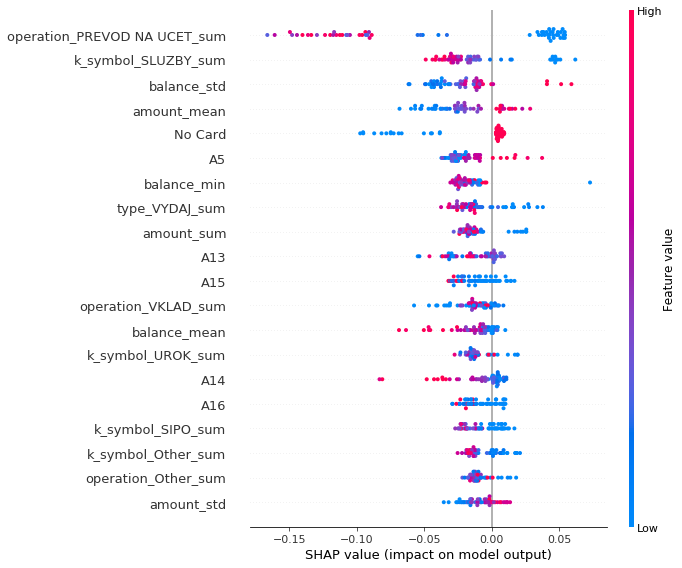

In [106]:
# Do Some SHAP value!?!?!?!

import shap

rf_explainer = shap.TreeExplainer(grid_search.best_estimator_)
rf_shap_values = rf_explainer.shap_values(X_val_transformed)

shap.initjs()
shap.force_plot(rf_explainer.expected_value[1],
                rf_shap_values[1],
                feature_names= transformed_columns)

shap.initjs()
shap.summary_plot(rf_shap_values[1],
                  features = X_val_transformed, 
                  feature_names = transformed_columns)